In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Subscriber prediction during trial period
## Exploratory Data Analysis

This notebook performs a preliminary data exploration in order to get familiar with data as a first step to frame the problem.
Before this some first glance is taken at data running general purpose data profiling.
Most of research aims to deeply understand the nature of the records in the data and how to combine both data sources.

- Activity data has many records per user and day.
- A few users have many paywall records.
- About 25% of users lack activity data, assuming ghost trials.
- Activity records decrease with time on trial, as users drop.
- About 10% users stop activity on 3 day trial.
- About 30% users stop activity on first day trial.
- About 30% users keep activity on last day trial.
- Target variable is fairly balanced, about 40% positive rate.
- There is not obvious target leakage, such as empty dates for no-customer.
- Activity records are assumed to aggregate individual sessions info, several times a day.

In [2]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from conf import Conf

sns.set_theme(style="darkgrid")

In [3]:
FOLDER_RAW = Conf().path_data_raw

filename_paywall = "users_onboarding_paywall.tsv"
filename_activity = "activities_per_day.tsv"

In [4]:
sep = "\t"
col_key = "user_id"
col_time_onb = "onboarding_home_at"
col_time_sub = "subscription_at"
col_label = "customer"
col_days_since_trial_start = "days_since_trial_start"

In [5]:
figsize=(8, 6)

In [6]:
df_paywall = pd.read_csv(os.path.join(FOLDER_RAW, filename_paywall), sep=sep)
df_paywall.head()

,user_id,onboarding_home_at,os_name,os_version,country,timezone,locale,device_type,device_model,source,level,age,signup_provider,signup_result_at,subscription_enter_at,price,currency,payment_platform,subscription_at,customer
0,23581630,2020-12-20T22:15:39Z,iOS,14.2,us,America/Los_Angeles,en,Apple,iPhone 6s Plus,launcher,beginner,3.0,email,2020-12-20T22:16:46Z,2020-12-28T01:57:03Z,14.99,USD,apple,2020-12-28T01:57:48Z,1
1,23662686,2020-12-26T06:33:47Z,iOS,13.7,th,Asia/Bangkok,th,Apple,"iPhone11,8",postonboarding,beginner,1.0,email,2020-12-26T06:35:26Z,2020-12-26T06:35:37Z,639.00,THB,apple,2020-12-26T06:36:16Z,0
2,23750411,2020-12-30T23:54:51Z,Android,10,br,America/Sao_Paulo,de,samsung,SM-A105FN,postonboarding,beginner,5.0,email,2020-12-30T23:56:22Z,2020-12-30T23:56:30Z,59.90,BRL,google,2020-12-30T23:57:24Z,1
3,23764095,2020-12-31T20:07:58Z,iOS,10.3.3,gb,Europe/London,it,Apple,iPad 4,launcher,medium,0.0,email,2020-12-31T20:10:32Z,2020-12-31T20:20:29Z,12.99,GBP,apple,2020-12-31T20:21:27Z,0
4,11675544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,launcher,NaN,NaN,NaN,NaN,2020-12-31T17:38:00Z,175.00,NOK,apple,2020-12-31T17:38:16Z,0


In [7]:
df_paywall.describe()

,user_id,age,price,customer
count,4.223900e+04,40081.000000,42239.00000,42239.000000
mean,2.202662e+07,3.895961,12815.52027,0.398707
std,4.150034e+06,2.436479,54295.14083,0.489638
min,8.485000e+03,-1.000000,7.99000,0.000000
25%,2.329158e+07,2.000000,14.99000,0.000000
50%,2.343915e+07,4.000000,25.99000,0.000000
75%,2.359582e+07,5.000000,379.00000,1.000000
max,2.376624e+07,14.000000,349000.00000,1.000000


In [8]:
cols_time = [col for col in df_paywall.columns if "_at" in col]
df_paywall[cols_time + [col_label]].head(20)

,onboarding_home_at,signup_result_at,subscription_enter_at,subscription_at,customer
0,2020-12-20T22:15:39Z,2020-12-20T22:16:46Z,2020-12-28T01:57:03Z,2020-12-28T01:57:48Z,1
1,2020-12-26T06:33:47Z,2020-12-26T06:35:26Z,2020-12-26T06:35:37Z,2020-12-26T06:36:16Z,0
2,2020-12-30T23:54:51Z,2020-12-30T23:56:22Z,2020-12-30T23:56:30Z,2020-12-30T23:57:24Z,1
3,2020-12-31T20:07:58Z,2020-12-31T20:10:32Z,2020-12-31T20:20:29Z,2020-12-31T20:21:27Z,0
4,NaN,NaN,2020-12-31T17:38:00Z,2020-12-31T17:38:16Z,0
5,2020-06-07T18:03:06Z,2020-06-07T18:04:37Z,2020-12-31T01:54:04Z,2020-12-31T01:54:33Z,0
6,2020-12-29T20:43:19Z,2020-12-29T20:45:10Z,2020-12-29T20:45:12Z,2020-12-29T20:45:25Z,1
7,2020-12-31T01:57:00Z,2020-12-31T02:01:57Z,2020-12-31T02:02:03Z,2020-12-31T02:02:26Z,0
8,2020-12-29T15:31:11Z,2020-12-29T15:32:35Z,2020-12-29T15:32:37Z,2020-12-29T15:32:54Z,1
9,2020-12-31T09:52:00Z,2020-12-31T09:53:47Z,2020-12-31T09:53:50Z,2020-12-31T09:54:09Z,0


In [9]:
df_activity = pd.read_csv(os.path.join(FOLDER_RAW, filename_activity), sep=sep)
df_activity.head()

,user_id,days_since_trial_start,n_sessions,n_feature_02,n_feature_03,n_feature_04,n_feature_05,n_feature_06,n_feature_07,n_feature_08,...,mean_feature_12,mean_feature_13,total_feature_14,total_feature_15,total_feature_16,total_feature_17,mean_feature_18,mean_feature_19,mean_feature_20,mean_feature_21
0,67208,4,1,1,0,0,0,1,0,0,...,0.0,0.0,46.172,0.000,0.0,0.0,1.110,0.0,0.0,0.0
1,96278,0,1,1,1,0,0,0,1,0,...,0.0,0.0,900.635,146.647,0.0,0.0,1.458,0.0,0.0,0.0
2,96278,2,1,1,2,0,0,0,1,0,...,0.0,0.0,32.160,227.378,0.0,0.0,0.587,0.0,0.0,0.0
3,96278,3,1,5,0,0,0,0,0,0,...,0.0,0.0,1258.857,0.000,0.0,0.0,1.018,0.0,0.0,0.0
4,96278,3,2,0,10,0,0,0,6,0,...,0.0,0.0,0.000,1358.587,0.0,0.0,0.000,0.0,0.0,0.0


In [10]:
df_activity.describe()

,user_id,days_since_trial_start,n_sessions,n_feature_02,n_feature_03,n_feature_04,n_feature_05,n_feature_06,n_feature_07,n_feature_08,...,mean_feature_12,mean_feature_13,total_feature_14,total_feature_15,total_feature_16,total_feature_17,mean_feature_18,mean_feature_19,mean_feature_20,mean_feature_21
count,1.097640e+05,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,...,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000,109764.000000
mean,2.165319e+07,2.171942,2.047566,8.267638,3.470974,2.126644,0.321244,5.442750,1.320779,1.826091,...,96.431921,30.919040,2683.393679,224.179261,299.081781,55.513195,11.935717,0.000011,4.506249,1.286763
std,4.635454e+06,2.086039,1.599417,15.627520,7.054682,5.186305,1.136477,10.298676,3.315746,4.558145,...,3094.498423,1112.999927,12019.845787,533.447732,4409.584577,1706.567151,774.752902,0.001041,424.006199,245.669331
min,6.720800e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-37509.218000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.328448e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.353856e+07,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,166.429000,3.928500,0.000000,0.000000,0.656000,0.000000,0.000000,0.000000
75%,2.365275e+07,4.000000,2.000000,10.000000,4.000000,2.000000,0.000000,7.000000,1.000000,2.000000,...,24.640438,0.000000,1130.961250,237.792500,59.702250,0.000000,1.339838,0.000000,0.558548,0.000000
max,2.376624e+07,6.000000,28.000000,377.000000,167.000000,470.000000,67.000000,223.000000,93.000000,432.000000,...,597475.988000,168363.495500,547376.623000,50812.670000,597475.988000,336726.991000,122523.847000,0.218000,89524.287000,78169.932000


In [11]:
df_paywall[col_key].value_counts()

23075116    4
23391779    3
21664951    3
23295096    3
23425172    2
           ..
10999152    1
23519065    1
23586166    1
23764345    1
23359905    1
Name: user_id, Length: 41983, dtype: int64

In [12]:
df_activity[col_key].value_counts()

22584081    25
23639521    25
22711777    24
23477219    24
21453624    24
            ..
23615913     1
23617966     1
23388606     1
23454174     1
23728130     1
Name: user_id, Length: 26132, dtype: int64

In [13]:
df_paywall[df_paywall[col_key] == 3376326]

,user_id,onboarding_home_at,os_name,os_version,country,timezone,locale,device_type,device_model,source,level,age,signup_provider,signup_result_at,subscription_enter_at,price,currency,payment_platform,subscription_at,customer
3627,3376326,2020-04-04T19:50:07Z,iOS,13.3.1,tr,Europe/Istanbul,tr,Apple,iPhone 7,launcher,beginner,3.0,NaN,NaN,2020-12-25T20:50:43Z,67.99,TRY,apple,2020-12-25T20:51:07Z,0
41615,3376326,2020-04-04T19:50:07Z,iOS,13.3.1,tr,Europe/Istanbul,tr,Apple,iPhone 7,launcher,beginner,3.0,NaN,NaN,2020-12-25T20:50:43Z,54.99,TRY,apple,2020-12-02T20:37:04Z,0


In [14]:
df_activity[df_activity[col_key] == 22584081]

,user_id,days_since_trial_start,n_sessions,n_feature_02,n_feature_03,n_feature_04,n_feature_05,n_feature_06,n_feature_07,n_feature_08,...,mean_feature_12,mean_feature_13,total_feature_14,total_feature_15,total_feature_16,total_feature_17,mean_feature_18,mean_feature_19,mean_feature_20,mean_feature_21
23116,22584081,0,10,76,0,0,0,55,0,0,...,0.000000,0.000000,16329.379,0.000,0.000,0.000,1.483526,0.0,0.000000,0.000
23117,22584081,0,5,0,0,10,0,0,0,9,...,81.188400,0.000000,0.000,0.000,811.884,0.000,0.000000,0.0,1.078800,0.000
23118,22584081,0,6,0,16,0,0,0,5,0,...,0.000000,0.000000,0.000,1154.883,0.000,0.000,0.000000,0.0,0.000000,0.000
23119,22584081,1,3,0,0,5,6,0,0,5,...,27.187200,34.196333,0.000,0.000,135.936,205.178,0.000000,0.0,0.609800,1.211
23120,22584081,1,8,40,0,0,0,11,0,0,...,0.000000,0.000000,35117.854,0.000,0.000,0.000,1.164725,0.0,0.000000,0.000
23121,22584081,1,9,0,36,0,0,0,20,0,...,0.000000,0.000000,0.000,4012.599,0.000,0.000,0.000000,0.0,0.000000,0.000
23122,22584081,2,1,0,0,0,1,0,0,0,...,0.000000,12.809000,0.000,0.000,0.000,12.809,0.000000,0.0,0.000000,0.377
23123,22584081,2,5,50,0,25,0,19,0,12,...,20.013360,0.000000,5582.136,0.000,500.334,0.000,1.444780,0.0,1.038720,0.000
23124,22584081,2,3,0,31,0,0,0,16,0,...,0.000000,0.000000,0.000,2184.360,0.000,0.000,0.000000,0.0,0.000000,0.000
23125,22584081,3,1,0,0,0,1,0,0,0,...,0.000000,5.307000,0.000,0.000,0.000,5.307,0.000000,0.0,0.000000,4679.459


In [15]:
df_paywall["diff_time"] = pd.to_datetime(df_paywall[col_time_onb]) - pd.to_datetime(df_paywall[col_time_sub])
df_paywall["diff_time"].describe()

count                           40335
mean     -26 days +08:32:31.126713772
std        70 days 19:18:34.495057952
min               -363 days +02:38:06
25%                 -1 days +23:31:59
50%                 -1 days +23:56:56
75%                 -1 days +23:58:13
max                  54 days 21:44:10
Name: diff_time, dtype: object

In [16]:
def inspect_dataset_overlap():
    df = pd.merge(
        left=df_paywall.drop_duplicates(subset=[col_key]),
        right=df_activity.drop_duplicates(subset=[col_key]),
        on=col_key,
        how="outer"
    )
    print(df.shape)
    return df[[col_label, col_days_since_trial_start]].isna().sum()

inspect_dataset_overlap()

(41983, 43)


customer                      0
days_since_trial_start    15851
dtype: int64

,n_records,n_sessions,n_users_active,n_users_last_active
days_since_trial_start,,,,
0,0.331766,0.365523,0.852556,0.303957
1,0.145977,0.147934,0.390670,0.074124
2,0.121297,0.116023,0.336178,0.070335
3,0.107695,0.101389,0.302694,0.072325
4,0.101618,0.093580,0.287961,0.087938
5,0.096070,0.087391,0.274376,0.121613
6,0.095578,0.088161,0.269708,0.269708


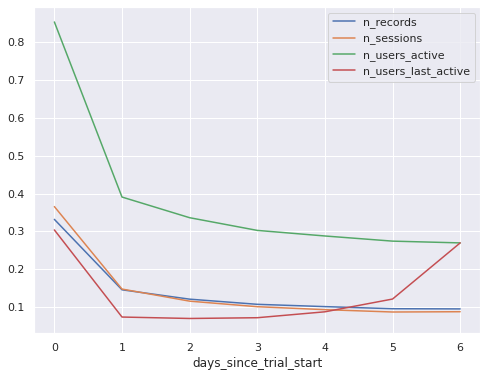

In [17]:
def inspect_trial_acivity():
    
    n_users = df_activity[col_key].nunique()
    df = (
        df_activity
        [col_days_since_trial_start]
        .value_counts(normalize=True)
        .reset_index()
    )
    df["n_sessions"] = (
        df_activity
        .groupby(col_days_since_trial_start)
        ["n_sessions"]
        .sum()
        / df_activity["n_sessions"].sum()
    )
    df["n_users_active"] = (
        df_activity
        .groupby(col_days_since_trial_start)
        [col_key]
        .nunique()
        / n_users
    )
    
    df["n_users_last_active"] = (
        df_activity
        .groupby(col_key)
        [col_days_since_trial_start]
        .max()
        .reset_index()
        .groupby(col_days_since_trial_start)
        .size()
        / n_users
    )
    
    df = (
        df
        .rename(columns={
            col_days_since_trial_start: "n_records",
            "index": col_days_since_trial_start
        })
        .set_index(col_days_since_trial_start)
    )
    df.plot(figsize=figsize)
    return df

inspect_trial_acivity()